## Loading explanations and comparing groups

One hundred randomly selected observations from the validation data were given "explanations" using the LIME algorithm. These explanations are contained in a dictionary which I load here, along with two files containing the indices and the predicted values. I also load another file that contains the names and descriptions of each variable.

In [1]:
import pickle
import pandas as pd
import string
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'figure.autolayout': False})

In [2]:
exp = pickle.load(open('lime_explanations.p','rb'))

In [3]:
exp

{3: [('f1i1_8.0 <= 0.00', 0.019260600964589199),
  ('hv3b1_1.0 <= 0.00', 0.013269125912319484),
  ('m1j2b > 0.56', -0.010119821029095416),
  ('m2b13b_3.0 <= 0.00', -0.0098325076113420402),
  ('m4d7 > 0.63', 0.0094918357478152877)],
 5: [('m4a13_8.0 <= 0.00', 0.089990995212514455),
  ('hv3cwtalone_0.0 <= 0.00', 0.066909580631638335),
  ('m2f2d1_12.0 <= 0.00', 0.018530056744309787),
  ('m2g1b_104.0 <= 0.00', 0.012908730828108539),
  ('0.00 < f4j25b1_3.0 <= 1.00', -0.0080361331626897254)],
 16: [('hv4v6b_1.0 <= 0.00', 0.024869987526413184),
  ('k5b1b_4.0 <= 0.00', 0.020869188864004198),
  ('f3k13p_6.0 <= 0.00', 0.017199616850527417),
  ('p5h17b_2.0 <= 0.00', -0.010704681424889707),
  ('f5a6a_1.0 > 0.00', 0.009190304184931504)],
 18: [('m2g5a8_1.0 <= 0.00', 0.05945583263851778),
  ('hv4r10a_3_1.0 <= 0.00', 0.056157552235171382),
  ('o5a3_3.0 <= 0.00', 0.042680345795655661),
  ('k5d1c_3.0 <= 0.00', 0.015619664957320126),
  ('0.00 < hv4l11_1.0 <= 1.00', -0.0084312646298517011)],
 28: [('m3c1

Now that the data have been loaded I first do some basic analysis to see the range of variables that are present in the explanations.

First I convert the explanations to a dictionary, which is an easier format to process than that returned by LIME. I then convert them to a pandas dataframe.

In [4]:
explanations = {}
for k,v in exp.items():
    user_exp = {}
    for x in v:
        user_exp[x[0]] = x[1]
    explanations[k] = user_exp

We can inspect a given element of the dictionary to see the explanation for a particular observation. For example the sub-dictionary below contains the explanation for observation 15. The keys in this dictionary are a combination of variables and values. For example the first key `f3d3a_5_1.0 <= 0.00` denotes the variable `f3d3a_5`, corresponding to the question posted to the father of the child in year 3 of the survey: "Who could you trust: child's sibling?". The second part of the key denotes that the response category `1.0` was less than or equal to `0`. Looking this up in the [survey documentation](https://fragilefamilies.princeton.edu/sites/fragilefamilies/files/ff_dad_cb3.txt) indicates that `1.0` indicates an answer of `Yes` to the question. While this syntax is somewhat confusing it indicates that this particular dummy variable had a value of 0 for this respondent. This therefore indicates that the child's rather did not answer yes to this particular question. The value of this element of the dictionary is a local coefficient generated by LIME that indicates the weight that this variable contributed to the local prediction. In this case the predictor was positive.



I now convert this dictionary into a pandas dataframe.

In [5]:
df = pd.DataFrame.from_dict(explanations, orient='index')

In [6]:
df.shape

(100, 475)

In [7]:
df.head()

,f1g9g_6.0 <= 0.00,m5e9_7_1.0 <= 0.00,f2k5_1.0 <= 0.00,p5j2g_2.0 <= 0.00,m3i0f_1.0 <= 0.00,hv3j19_3.0 <= 0.00,m2c3f_204.0 <= 0.00,f3b4h_2.0 > 0.00,m4h4_2.0 <= 0.00,k5g1b_2.0 <= 0.00,...,f1e4a_8.0 <= 0.00,f3d4_5.0 <= 0.00,k5e1c_1.0 <= 0.00,hv3c6a_3.0 <= 0.00,f2b38d_2.0 <= 0.00,f4h1q_0.0 <= 0.00,f2h7c_102.0 <= 0.00,p5i4_3.0 <= 0.00,0.00 < hv4c1e_4.0 <= 1.00,0.00 < m2k6_2.0 <= 1.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, to get a sense of the important variables I can simplify the columns by extracting the variable names and creating a new dataframe. Apologies for the rather ugly code.

In [8]:
def extract_variable_name(s):
    """
    This function parses the column names in the explanations to extract the variable name
    from the FF survey.
    
    I have left in the comments to illustrate how the algorithm is working."""
    components = s.split()
    print(s)
    try: 
        float(components[0]) # if first component can be case to a float then var name in 2nd
        print('First component is a float')
        var = components[2]
        print('Name is in ', var)
    except ValueError:
        var = components[0]
        print('Name is in ', var)
        
    if '_' in var:
        subcomponents = var.split('_')
        if var.count('_') == 1:
            # if substring after the _ can't be cast to float then it is part of the name
            try:
                float(subcomponents[1])
                varname = subcomponents[0]
            except ValueError:
                varname = var
        elif var.count('_') > 1:
            print("More than one underscore in ", var)
            varname = subcomponents[0]+'_'+subcomponents[1]
            print("Variable name is ", varname)
            
    else:
        varname = var
    print(varname)
    return varname 

explanations_2 = {}
for k,v in explanations.items():
    user_exp = {}
    for x, v in v.items():
        var = extract_variable_name(x)
        user_exp[var] = v
    explanations_2[k] = user_exp
    
df_names = pd.DataFrame.from_dict(explanations_2, orient='index')

f1g9g_6.0 <= 0.00
Name is in  f1g9g_6.0
f1g9g
m5e9_7_1.0 <= 0.00
Name is in  m5e9_7_1.0
More than one underscore in  m5e9_7_1.0
Variable name is  m5e9_7
m5e9_7
f2k5_1.0 <= 0.00
Name is in  f2k5_1.0
f2k5
p5j2g_2.0 <= 0.00
Name is in  p5j2g_2.0
p5j2g
m3i0f_1.0 <= 0.00
Name is in  m3i0f_1.0
m3i0f
hv3j19_3.0 <= 0.00
Name is in  hv3j19_3.0
hv3j19
m2c3f_204.0 <= 0.00
Name is in  m2c3f_204.0
m2c3f
f3b4h_2.0 > 0.00
Name is in  f3b4h_2.0
f3b4h
m4h4_2.0 <= 0.00
Name is in  m4h4_2.0
m4h4
k5g1b_2.0 <= 0.00
Name is in  k5g1b_2.0
k5g1b
m3i21_3.0 <= 0.00
Name is in  m3i21_3.0
m3i21
p5q3bb1_3.0 <= 0.00
Name is in  p5q3bb1_3.0
p5q3bb1
hv4a24_1.0 <= 0.00
Name is in  hv4a24_1.0
hv4a24
cf5marm_1.0 <= 0.00
Name is in  cf5marm_1.0
cf5marm
f4i0m4_2.0 <= 0.00
Name is in  f4i0m4_2.0
f4i0m4
m4b3_20.0 <= 0.00
Name is in  m4b3_20.0
m4b3
m2h9a3_103.0 <= 0.00
Name is in  m2h9a3_103.0
m2h9a3
p5q3g_3.0 <= 0.00
Name is in  p5q3g_3.0
p5q3g
cf1edu_3.0 > 0.00
Name is in  cf1edu_3.0
cf1edu
0.11 < m2k16 <= 1.13
First compo

m4i2_6.0 <= 0.00
Name is in  m4i2_6.0
m4i2
f4b4b19_2.0 <= 0.00
Name is in  f4b4b19_2.0
f4b4b19
hv4pvceilr_10.0 <= 0.00
Name is in  hv4pvceilr_10.0
hv4pvceilr
0.00 < hv3m17_0.0 <= 1.00
First component is a float
Name is in  hv3m17_0.0
hv3m17
m1f10b_5.0 <= 0.00
Name is in  m1f10b_5.0
m1f10b
m4i4a_102.0 <= 0.00
Name is in  m4i4a_102.0
m4i4a
o5f2_2.0 <= 0.00
Name is in  o5f2_2.0
o5f2
f4b6b_1.0 <= 0.00
Name is in  f4b6b_1.0
f4b6b
p5i1d_4.0 <= 0.00
Name is in  p5i1d_4.0
p5i1d
hv3a6a_5.0 <= 0.00
Name is in  hv3a6a_5.0
hv3a6a
hv3pvnceil_m_1.0 <= 0.00
Name is in  hv3pvnceil_m_1.0
More than one underscore in  hv3pvnceil_m_1.0
Variable name is  hv3pvnceil_m
hv3pvnceil_m
f4b4b18_1.0 <= 0.00
Name is in  f4b4b18_1.0
f4b4b18
m2b29_1.0 <= 0.00
Name is in  m2b29_1.0
m2b29
0.00 < p5q3u_1.0 <= 1.00
First component is a float
Name is in  p5q3u_1.0
p5q3u
m3b4a_0.0 <= 0.00
Name is in  m3b4a_0.0
m3b4a
m4c36_0.0 <= 0.00
Name is in  m4c36_0.0
m4c36
cm5finjail_1.0 <= 0.00
Name is in  cm5finjail_1.0
cm5finjail
p

In [9]:
df_names.shape

(100, 419)

In [10]:
names = list(df_names.columns)

In [11]:
df_names.head()

,f1g9g,m5e9_7,f2k5,p5j2g,m3i0f,hv3j19,m2c3f,f3b4h,m4h4,k5g1b,...,m3j18a,m2c23c,f1e4a,f3d4,k5e1c,f2b38d,f4h1q,p5i4,hv4c1e,m2k6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also defining a new dataframe and a function to count the number of observations each variable occurs in:

In [12]:
df_names_counts = df_names.notnull()*1

def count_occurrences(var):
    return df_names_counts[var].sum()

In [13]:
count_occurrences('m4h4')

1

# Getting variable metadata

To get metadata for these variables there are a number of different steps. During the challenge, participant Connor Gilroy created a meta-data csv file that contains some information on each variable; since the challenge the Fragile Families team have built an API to programmatically get metadata. I mostly rely on the API below but use Gilroy's csv when metadata is not available.


Loading Gilroy's file:

In [14]:
meta = pd.read_csv('ffc_variable_types.csv')
meta.index = meta['variable']
del meta['variable']

Copying over [code](https://github.com/fragilefamilieschallenge/ffmetadata-py/blob/master/ff.py) from the challenge github.

In [15]:
"""============================================================================
Python wrapper for the Fragile Families Metadata API.
Examples
--------
>>> import ff
>>> data = ff.select('cm1relf')
>>> data = ff.filter(responses='sometimes')
>>> data = ff.search('age', 'label')
============================================================================"""

import requests

# -----------------------------------------------------------------------------

BASE_URL = 'http://api.fragilefamiliesmetadata.org'


# -----------------------------------------------------------------------------

def select(var_name, field_name=None):
    """Returns dictionary of metadata for variable `var_name`. Provided an
    optional `field_name`, return only data for the specified field.
    """
    params = {'varName': var_name}
    if field_name:
        params['fieldName'] = field_name
    return _get('select', params)


# -----------------------------------------------------------------------------

def filter(**kwargs):
    """Return a list of variables where each field name matches the provided
    value.
    """
    params = dict(kwargs)
    return _get('filter', params)['matches']


# -----------------------------------------------------------------------------

def search(query, field_name):
    """Return a list of variables where `query` is found in `field_name`.
    """
    params = {'query': query, 'fieldName': field_name}
    return _get('search', params)['matches']


# -----------------------------------------------------------------------------

def _get(endpoint, params):
    """Return JSON as dictionary based on endpoint and query parameters.
    """
    url = '%s/%s' % (BASE_URL, endpoint)
    url = requests.Request('GET', url, params=params).prepare().url
    response = requests.get(url)
    if response.status_code == 500:
        raise ConnectionError(response.reason)
    json = response.json()
    if 'error code' in json:
        raise AttributeError(json['error_description'])
    return json

The names of some of the variables used in the challenge have changed so they cannot be found in the API. This section creates a dictionary mapping the old names to the new names. Note that some variables from the challenge are not in the metadata so may still fail to be found.

In [16]:
# Getting the raw metadata file and creating a name conversion dictionary
url = "http://browse.fragilefamiliesmetadata.org/get_metadata"
df = pd.read_csv(url, encoding="latin1")
old_name_to_new_name = {}
for _, r in df.iterrows():
  old_name_to_new_name[r['old_name']] = r['new_name']

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


It turns out that some of the variables have been renamed multiple times and cannot easily be found in the metadata, either in the new API or in Connor Gilroy's file. After discussion on Github it appears that almost all of these come from the in-house survey. The following function can be used to convert these to get names that can be used to get metadata from the new API.

In [17]:
def convertToNew(var):
    """Takes an old variable name from the in house survey and converts it to a new one."""
    chars = [x for x in string.ascii_lowercase]
    if not var.startswith('hv'):
        print("This variable does not start with hv")
        return
    else:
        var = var[2:] # Remove hv prefix
        if var[1] in chars[:14]: #if [a-n]
            return 'p'+var
        elif var[1] in chars[14:22]: #if [p-v]
            if var[2] in chars: # if next element is another character
                return 'ch'+var 
            else: # if not assign o prefix
                return 'o'+var

Now I can finally iterate through the names and get as much metadata as possible. The code before first checks the API for the raw variable name. If this fails it uses the dictionary to get the old name and then checks the API again. If this still fails it either uses the above function to get the new name (if the variable prefix is 'hv') or uses Gilroy's metadata. If either of these fail then it sets the metadata to None.

In [18]:
error = 0
meta_data = {}
count_by_new_name = {} # A dictionary mapping the new name to the number of observations var occurs in
for i in names:

    try:
        m = select(i)
        meta_data[i] = m
        count_by_new_name[i] = count_occurrences(i)
    except:
        try:
            n = old_name_to_new_name[i]
            m = select(n)
            meta_data[n] = m
            count_by_new_name[n] = count_occurrences(i)
        except:

            try:
                if i.startswith('hv'):
                    n = convertToNew(i)
                    m = select(n)
                    meta_data[n] = m
                    count_by_new_name[n] = count_occurrences(i)
                else:
                    print("Getting information from original metadata for ",i)
                    meta_data[i] = meta.loc[i]
                    count_by_new_name[i] = count_occurrences(i)
            except:
                print("Unable to obtain metadata for ",i)
                meta_data[i] = None
                count_by_new_name[i] = count_occurrences(i)

Getting information from original metadata for  f1b13
Getting information from original metadata for  m4d7
Unable to obtain metadata for  hv3c_c3
Unable to obtain metadata for  hv3r10a7
Unable to obtain metadata for  hv3cwtalone
Unable to obtain metadata for  hv4cflag
Unable to obtain metadata for  hv4agemos
Unable to obtain metadata for  hv4food_exp


In [19]:
[x for x in meta_data.keys() if meta_data[x] is None]

['hv3c_c3', 'hv3r10a7', 'hv3cwtalone', 'hv4cflag', 'hv4agemos', 'hv4food_exp']

In [20]:
len(meta_data)

419

After running this procedure the metadata has been obtained for all but 8 of these variables. These are ignored in the analysis below.

Now to consider analysis to summarize the findings:

- Top K most frequently occuring values
- Histogram of relevant waves
- Histogram of respondents
- Histogram of topic / umbrella topic

In [21]:
from collections import defaultdict

# Top 25 most frequent

In [22]:
for i, j in sorted(count_by_new_name.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(meta_data[i]['label'], j)

J9. Amount paid for take out food or delivery in last month 5
How much rent do you pay each month? 4
How old was child when you first started using primary arrang. (month)? 3
Agree/disagree: being a parent is harder than I expected 3
A1A. How often PCG knows what you do during your free time 3
G1. Past year, times PCG explained to child why something child did was wrong 3
A6a. Where do you usually go for health care? 3
How many hours do you usually work per week at that job? 3
First principal component scale created from m4d7a-p 3
How many hrs/wk do/did you work at your current/most recent job? 3
In last 2 yrs, how many romantic relationships lasted one month plus? 3
A21. How many hours/day does child spend in room with someone smoking? 3
B24. How many horus of sleep do you usually get? 3
A5D. Household member's relationship to you 3
What is third person's relationship to you? 3
In last 2 yrs # times you & child been separated for a wk+? 2
Q3G. Child can't concentrate, can't pay attent

62 variables of 419 appear in more than one explanation.

In [23]:
62/419

0.14797136038186157

## Creating a table summarizing all of the variables

In [24]:
respondent_map = {'m':'Mother',
                  'f': 'Father',
                 'p': 'Primary caregiver',
                 't': 'Teacher',
                 'o': 'Home (Observation)',
                 'h': 'Home (Survey)',
                 'k': 'Child',
                 'q': 'Couple'}

In [26]:
table_data = {}
for k,v in meta_data.items():
    try:
        wave = v['wave']
        respondent = respondent_map[v['respondent']]
        topics1 = v['topics'][0]
        topic1 = topics1['topic']
        umbrella1 = topics1['umbrella']
        try:
            topics2 = v['topics'][1]
            topic2 = topics2['topic']
            umbrella2 = topics2['umbrella']
            table_data[k] = {'Count in LIME exp.': count_by_new_name[k],'Wave':wave, 'Respondent': respondent,
                        'Umbrella topic(s)':umbrella1+' & '+umbrella2, 'Topic(s)':topic1+' & '+topic2}
        except:
            table_data[k] = {'Count in LIME exp.': count_by_new_name[k],'Wave':wave, 'Respondent': respondent,
                           'Umbrella topic(s)':umbrella1, 'Topic(s)':topic1}
    except:
        pass


In [28]:
results_and_metadata = pd.DataFrame.from_dict(table_data, orient='index')

In [29]:
results_and_metadata.head()

,Count in LIME exp.,Wave,Respondent,Umbrella topic(s),Topic(s)
cf1edu,1,1,Father,Education and school,educational attainment/achievement
cf1kids,1,1,Father,Home and housing,household composition
cf1povca,1,1,Father,Finances,household income/poverty
cf2hhimpb,1,2,Father,Finances,household income/poverty
cf2povca,1,2,Father,Finances,household income/poverty


In [30]:
results_and_metadata.to_csv('results_and_metadata.csv')

# Waves

In [31]:
wave_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        wave_count[v['wave']] += count_by_new_name[k]
    except:
        pass

In [32]:
sorted(wave_count.items(), key=lambda x: x[1], reverse=True)

[('4', 135), ('5', 128), ('3', 109), ('2', 73), ('1', 42)]

In [33]:
wave_count

defaultdict(int, {'1': 42, '2': 73, '3': 109, '4': 135, '5': 128})

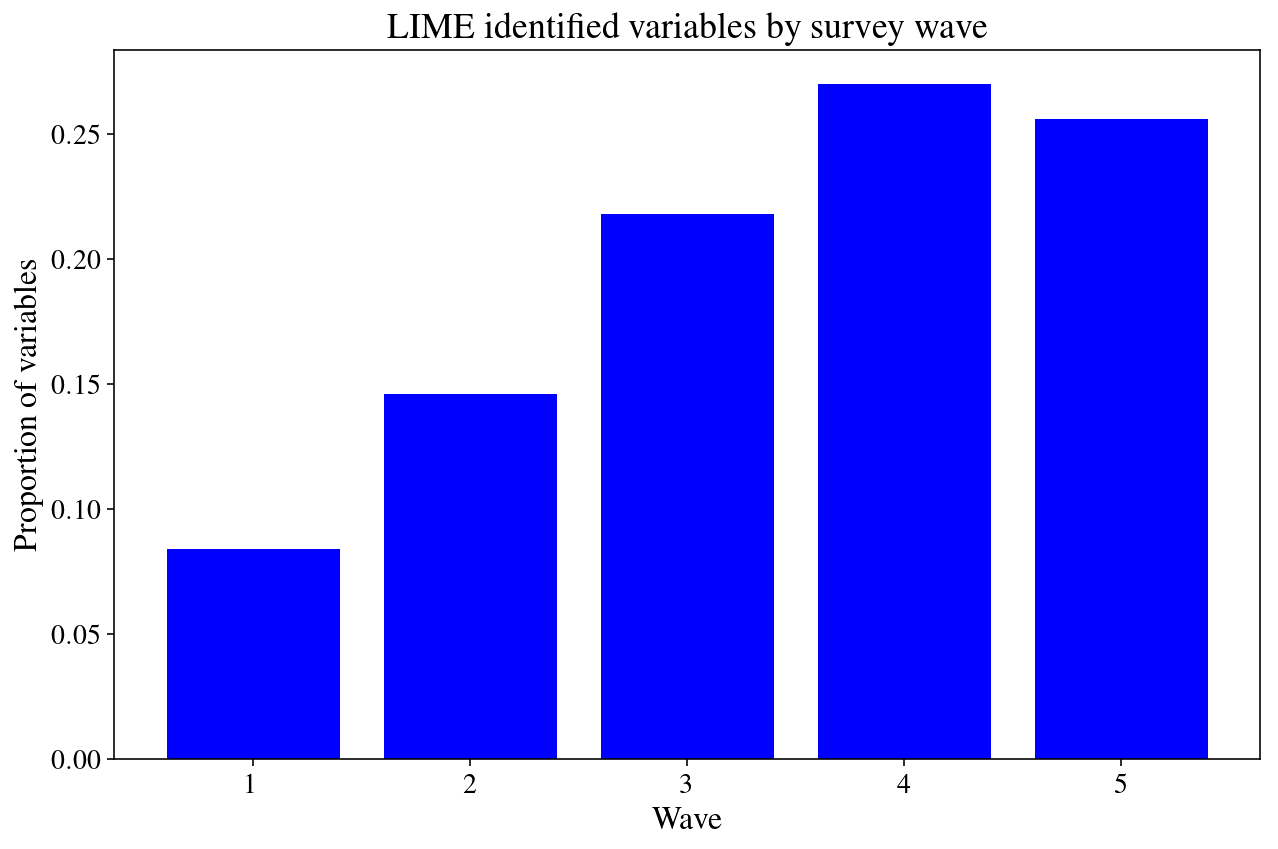

In [34]:
data = list(sorted(wave_count.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical')
plt.title('LIME identified variables by survey wave',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.xticks(size=14, rotation=360)
plt.yticks(size=14)
plt.tight_layout()
plt.show()

# Respondents

In [35]:
respondent_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        respondent_count[v['respondent']] += count_by_new_name[k]
    except:
        pass

### Respondent codes
m = mother
f = father
p = primary caregiver
t = teacher
o = home (observation)
h = home (survey)
k = child
q = couple

In [36]:
respondent_count_ = {}
for k,v in respondent_count.items():
    respondent_count_[respondent_map[k]] = v

In [37]:
sorted(respondent_count_.items(), key=lambda x: x[1], reverse=True)

[('Mother', 157),
 ('Father', 135),
 ('Primary caregiver', 123),
 ('Teacher', 28),
 ('Home (Observation)', 17),
 ('Child', 14),
 ('Home (Survey)', 12),
 ('Couple', 1)]

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 8 Text yticklabel objects>)

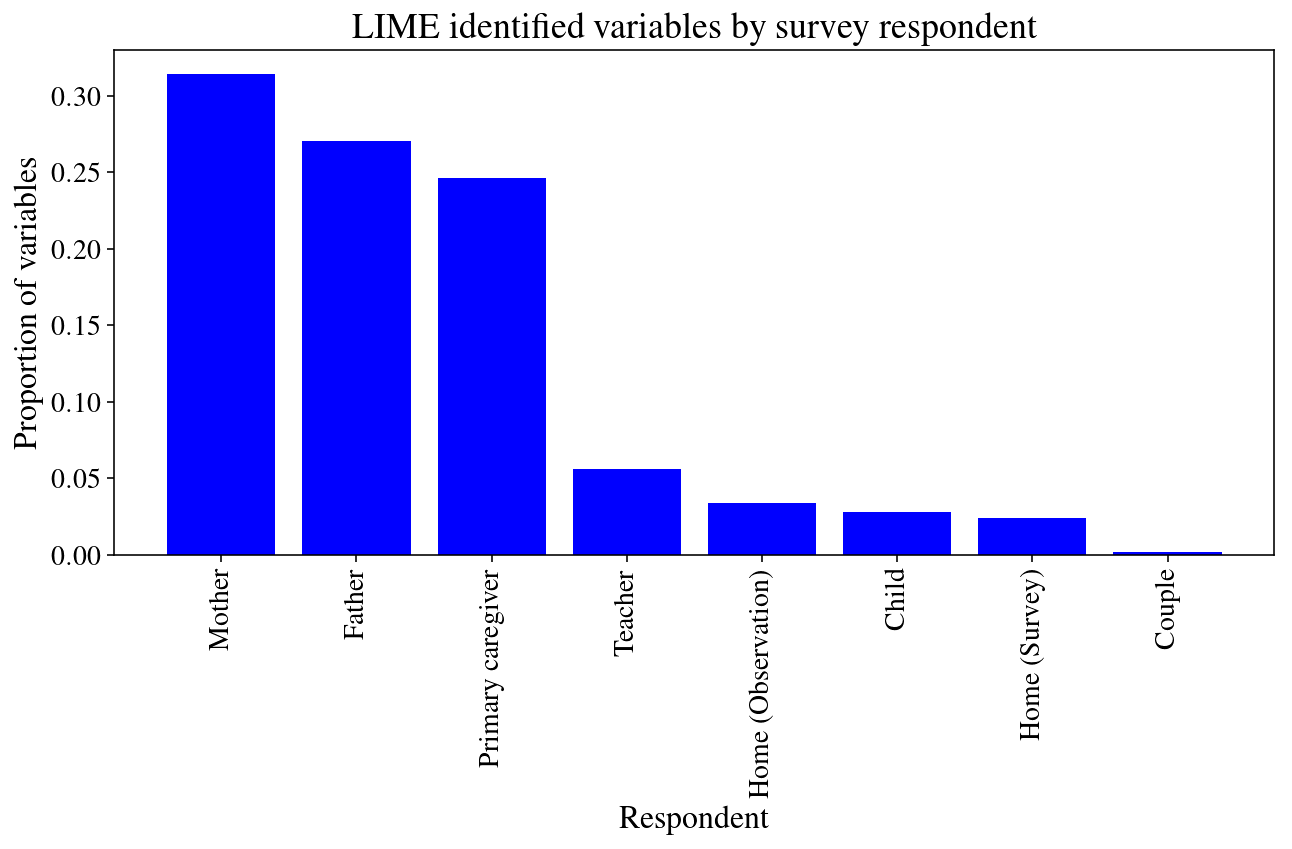

In [38]:
data = list(sorted(respondent_count_.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical', size=14)
plt.title('LIME identified variables by survey respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Respondent', size=16)
plt.tight_layout()
plt.yticks(size=14)

# Topic

In [39]:
topic_count = defaultdict(int)
umbrella_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        for t in v['topics']:
            topic_count[t['topic']] += count_by_new_name[k]
            if t['umbrella'] == 'Parenting':
                print(v['label'])
            umbrella_count[t['umbrella']] += count_by_new_name[k]
    except:
        pass

J19. Past year, times you were so drunk/high had problem taking care of child
How many days a week does father-Take child to visit relatives?
Days/week: play inside with toys with child?
# Days/week mom sing songs or nursery rhymes to child?
J23b. Past year, times SCG put child in time out or sent child to room
B6. On weekends, hours/day child spends playing outdoors?
I1G. Frequency you talked about current events with child in past month
C1D. How important that fathers show love and affection
Days/week: put child to bed?
Agree/disagree: being a parent is harder than I expected
How often-Does mother respect schedules/rules you make for child?
Days/week: read stories to child?
A1A. How often PCG knows what you do during your free time
Agree/disagree: being a parent is harder than I thought it would be
Always/sometimes/rarely true: respect wishes about how child should be raised?
F1e. Since having child you feel that you are almost never able to do things
G1. Past year, times PCG explain

In [40]:
sorted(topic_count.items(), key=lambda x: x[1], reverse=True)

[('parenting behavior', 87),
 ('behavior', 65),
 ('household composition', 29),
 ('student experiences', 26),
 ('parenting abilities', 21),
 ('employment - traditional work', 20),
 ('public transfers and social services', 19),
 ('attitudes/expectations/happiness', 17),
 ('parental relationship quality', 15),
 ('mental health', 14),
 ('social support', 12),
 ('paradata', 12),
 ('neighborhood conditions', 11),
 ('expenses', 11),
 ('cognitive skills', 11),
 ('home environment', 11),
 ('health behavior', 10),
 ('fertility history', 10),
 ('physical health', 9),
 ('parental relationship status', 9),
 ('childcare services and availability', 9),
 ('educational attainment/achievement', 8),
 ('community participation', 7),
 ('child living arrangements', 7),
 ('housing status', 7),
 ('health care access and insurance', 7),
 ("parents' family background", 7),
 ('parent school involvement', 6),
 ('age', 6),
 ('grandparents', 6),
 ('household income/poverty', 6),
 ('parent-child contact', 5),
 ('pr

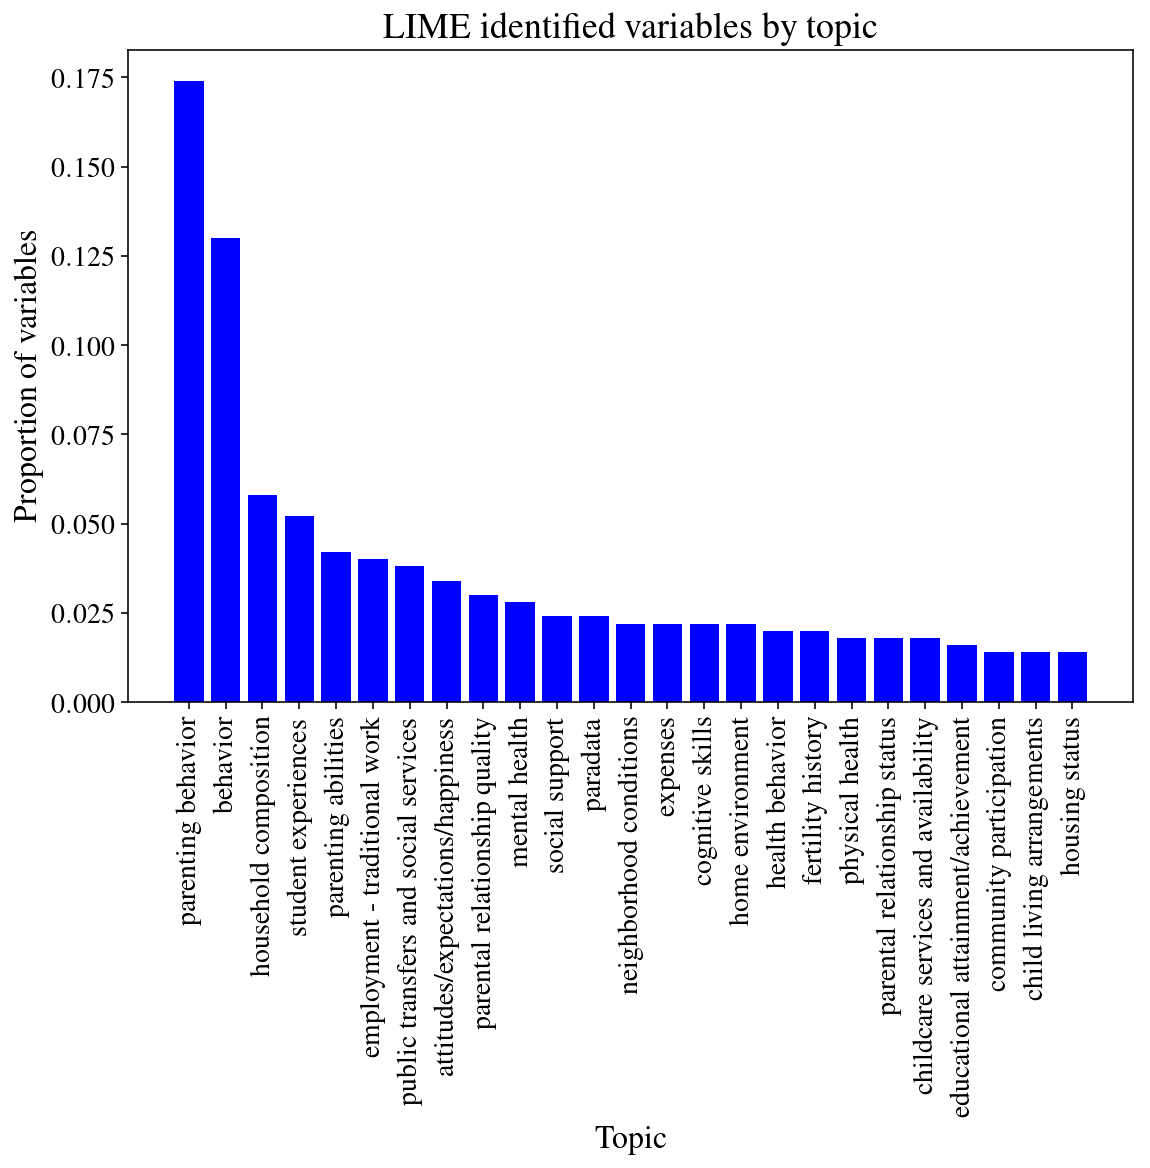

In [41]:
data = list(sorted(topic_count.items(), key=lambda x: x[1], reverse=True))[:25]
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('LIME identified variables by topic',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Topic', size=16)
plt.yticks(size=14)
plt.show()

In [42]:
sorted(umbrella_count.items(), key=lambda x: x[1], reverse=True)

[('Parenting', 115),
 ('Cognitive and behavioral development', 76),
 ('Home and housing', 59),
 ('Finances', 58),
 ('Health and health behavior', 54),
 ('Education and school', 46),
 ('Parental relationships', 30),
 ('Family and social support', 25),
 ('Employment', 23),
 ('Community', 18),
 ('Attitudes and expectations', 17),
 ('Paradata and weights', 15),
 ('Childcare', 9),
 ('Demographics', 9),
 ('Legal system', 7)]

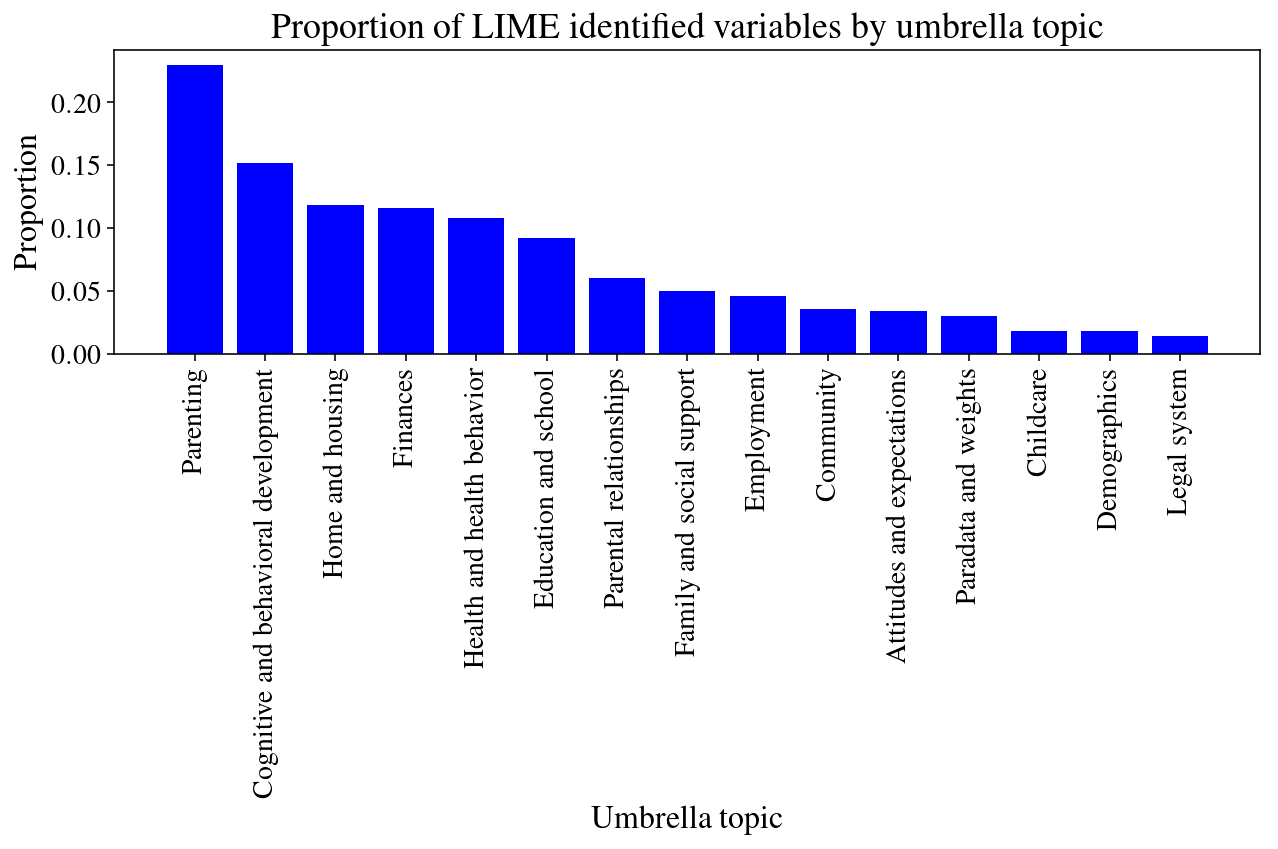

In [43]:
data = list(sorted(umbrella_count.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables by umbrella topic',size=18)
plt.ylabel('Proportion',size=16)
plt.xlabel('Umbrella topic', size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('umbrella_topic_proportions.pdf')
plt.show()

## Differences in proportions and ratios

Finding proportion of questions in each wave

In [44]:
df = df[df['wave'] != 6.0] # We do not want to include wave 6 as it was not used in the Challenge

In [45]:
df = df[df['new_name'] != 'idnum']

In [46]:
from collections import Counter

In [47]:
wave_count_full = {}
for k,v in dict(Counter(list(df['wave']))).items():
    wave_count_full[str(int(k))] = v
wave_count_full

{'1': 845, '2': 1885, '3': 4830, '4': 3934, '5': 3863}

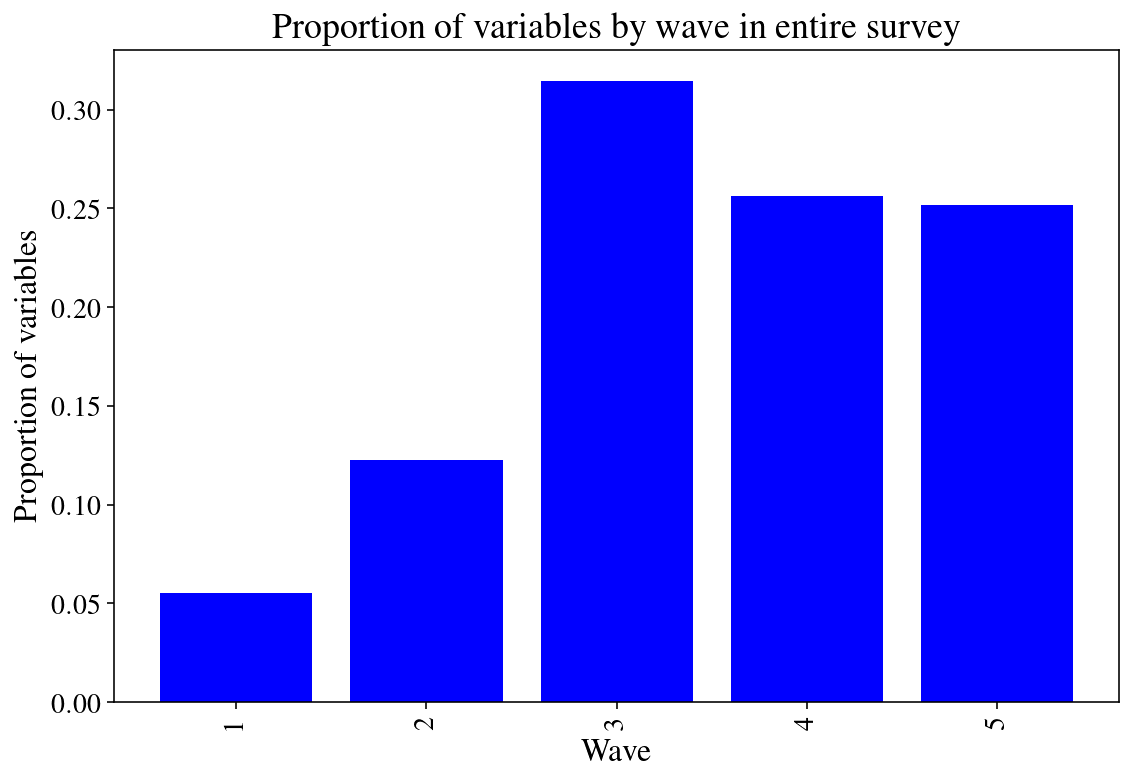

In [48]:
data = list(sorted(wave_count_full.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/df.shape[0] for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of variables by wave in entire survey',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.yticks(size=14)
plt.show()

Now to take the difference between the proportion in my results and the proportion in the survey overall.

In [49]:
wave_count_full

{'1': 845, '2': 1885, '3': 4830, '4': 3934, '5': 3863}

In [50]:
wave_counts_mod = {}
for k,v in wave_count.items():
    prop_observed = v/500
    prop_in_survey = wave_count_full[k]/df.shape[0]
    wave_counts_mod[k] = prop_observed-prop_in_survey # Diff in proportion

In [51]:
wave_counts_mod

{'1': 0.028976232337045001,
 '2': 0.02325467213648498,
 '3': -0.096514553623754634,
 '4': 0.013830175164420144,
 '5': 0.0044534739858045347}

In [52]:
wsignif = {}
for k,v in wave_count.items():
    count = np.array([v, wave_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        wsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        wsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        wsignif[k] = '**'
    elif pval <= 0.001:
        wsignif[k] = '***'

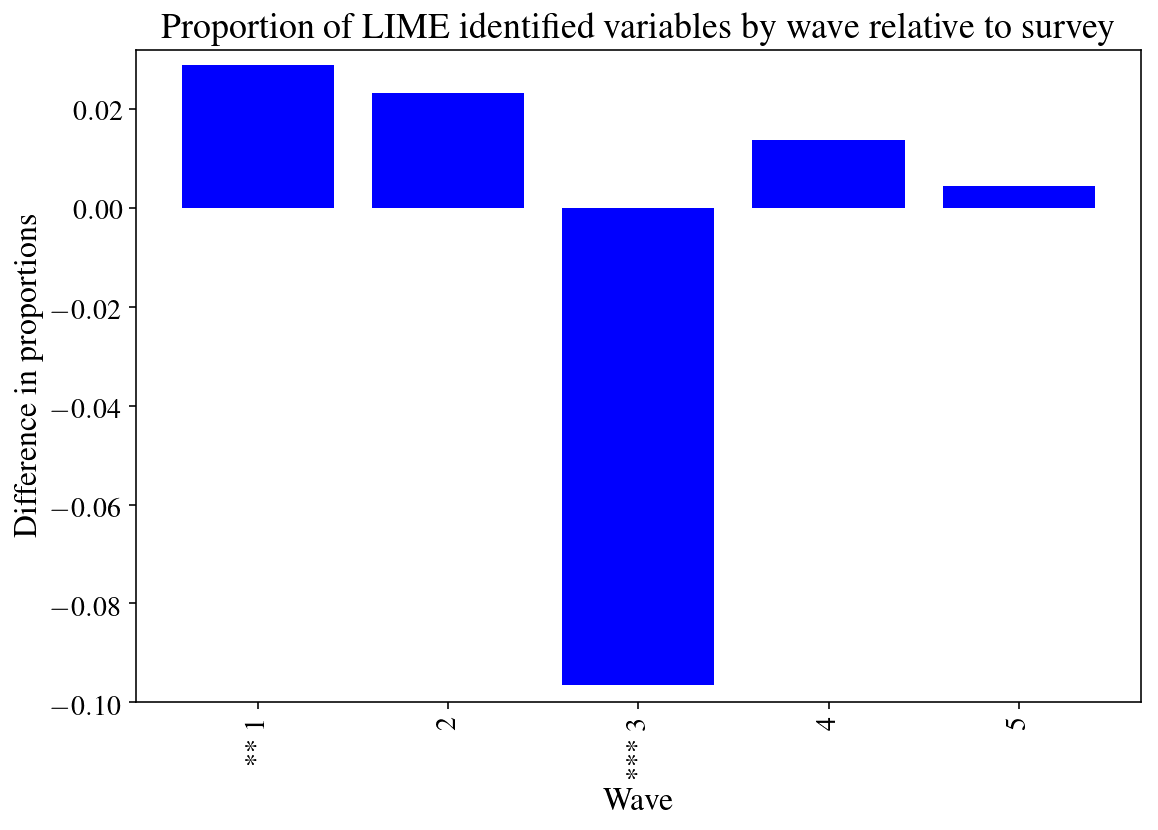

In [53]:
data = list(sorted(wave_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [wsignif[x] + ' ' + x for x in word], rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables by wave relative to survey',size=18)
plt.ylabel('Difference in proportions',size=16)
plt.xlabel('Wave', size=16)
plt.ylim(-0.10, 0.032)
plt.yticks(size=14)
plt.show()

In [54]:
wave_counts_mod = {}
for k,v in wave_count.items():
    prop_observed = v/500
    prop_in_survey = wave_count_full[k]/df.shape[0]
    wave_counts_mod[k] = prop_observed/prop_in_survey # Ratio

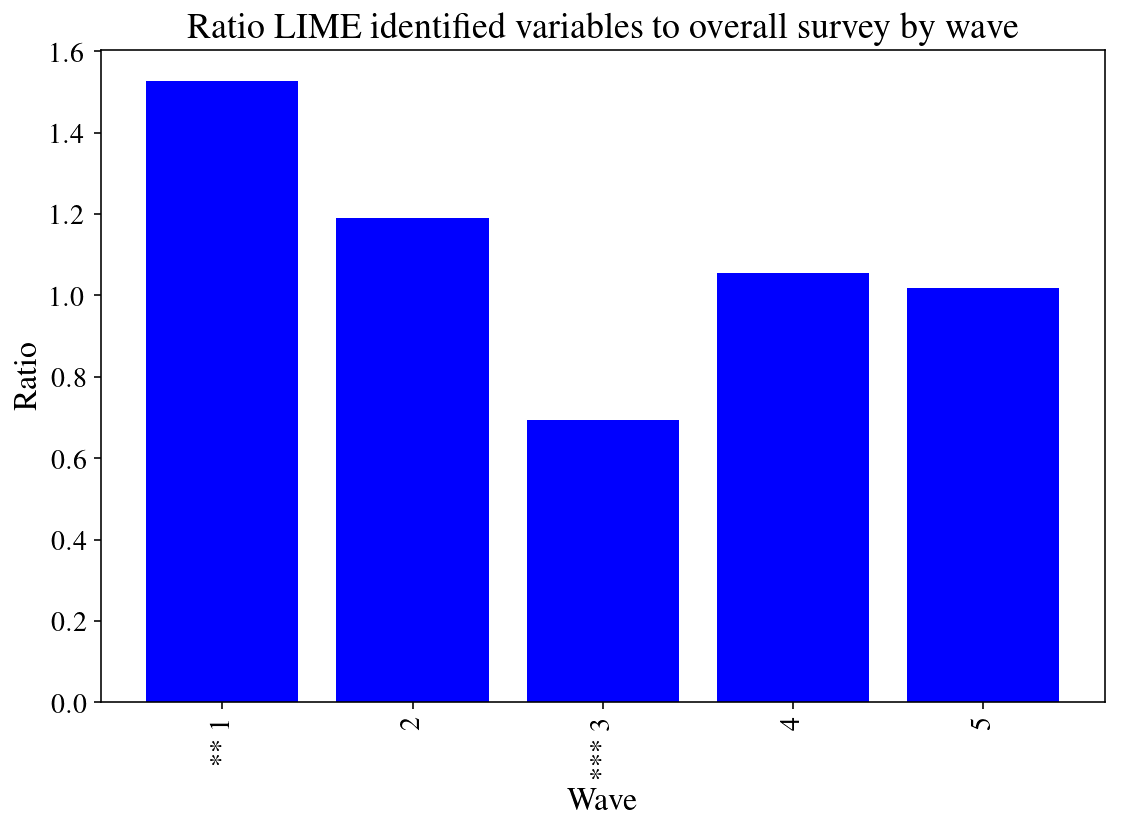

In [55]:
data = list(sorted(wave_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [wsignif[x] + ' ' + x for x in word], rotation='vertical',size=14)
plt.title('Ratio LIME identified variables to overall survey by wave',size=18)
plt.ylabel('Ratio',size=16)
plt.xlabel('Wave', size=16)
#plt.ylim(-0.10, 0.032)
plt.yticks(size=14)
plt.show()

Now to do the same for respondents:

In [56]:
resp_count_full = {}
for k,v in dict(Counter(list(df['respondent']))).items():
    resp_count_full[k] = v
resp_count_full

{'d': 422,
 'e': 60,
 'f': 4556,
 'h': 1598,
 'k': 483,
 'm': 4692,
 'n': 216,
 'o': 323,
 'p': 1703,
 'q': 370,
 'r': 407,
 's': 53,
 't': 415,
 'u': 59}

In [57]:
resp_count_full_restricted = {}
for k,v in resp_count_full.items():
    if respondent_map.get(k):
        resp_count_full_restricted[respondent_map[k]] = v

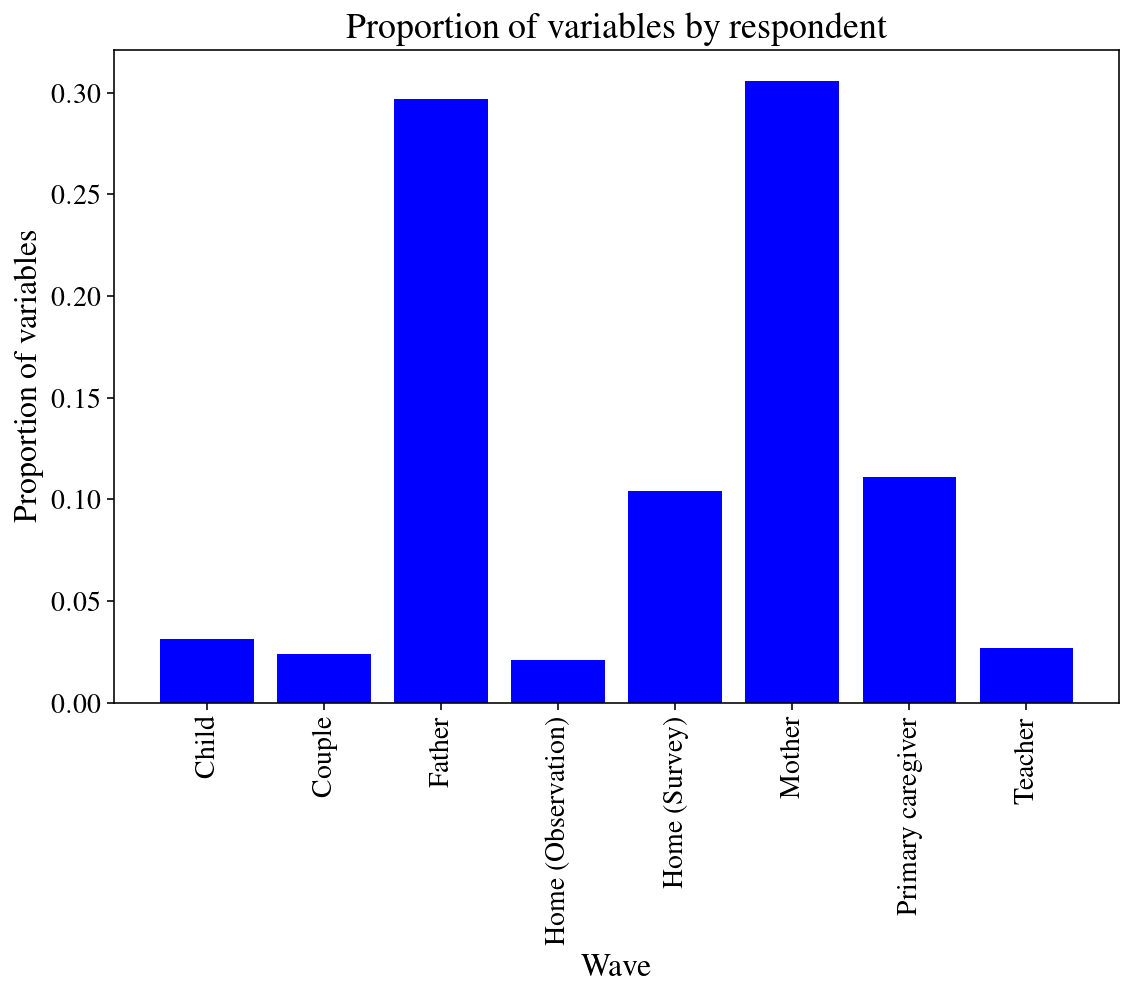

In [58]:
data = list(sorted(resp_count_full_restricted.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/df.shape[0] for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of variables by respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.yticks(size=14)
plt.show()

In [59]:
resp_counts_mod = {}
for k,v in respondent_count_.items():
    prop_observed = v/500
    prop_in_survey = resp_count_full_restricted[k]/df.shape[0]
    resp_counts_mod[k] = prop_observed-prop_in_survey

In [60]:
resp_counts_mod

{'Child': -0.0034514553623754655,
 'Couple': -0.022093247379045389,
 'Father': -0.026672527186299366,
 'Home (Observation)': 0.012967246206941462,
 'Home (Survey)': -0.080056781923552783,
 'Mother': 0.0084715764797811954,
 'Primary caregiver': 0.13510594517158298,
 'Teacher': 0.028976492804584229}

In [61]:
rsignif = {}
for k,v in respondent_count_.items():
    count = np.array([v, resp_count_full_restricted[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        rsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        rsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        rsignif[k] = '**'
    elif pval <= 0.001:
        rsignif[k] = '***'

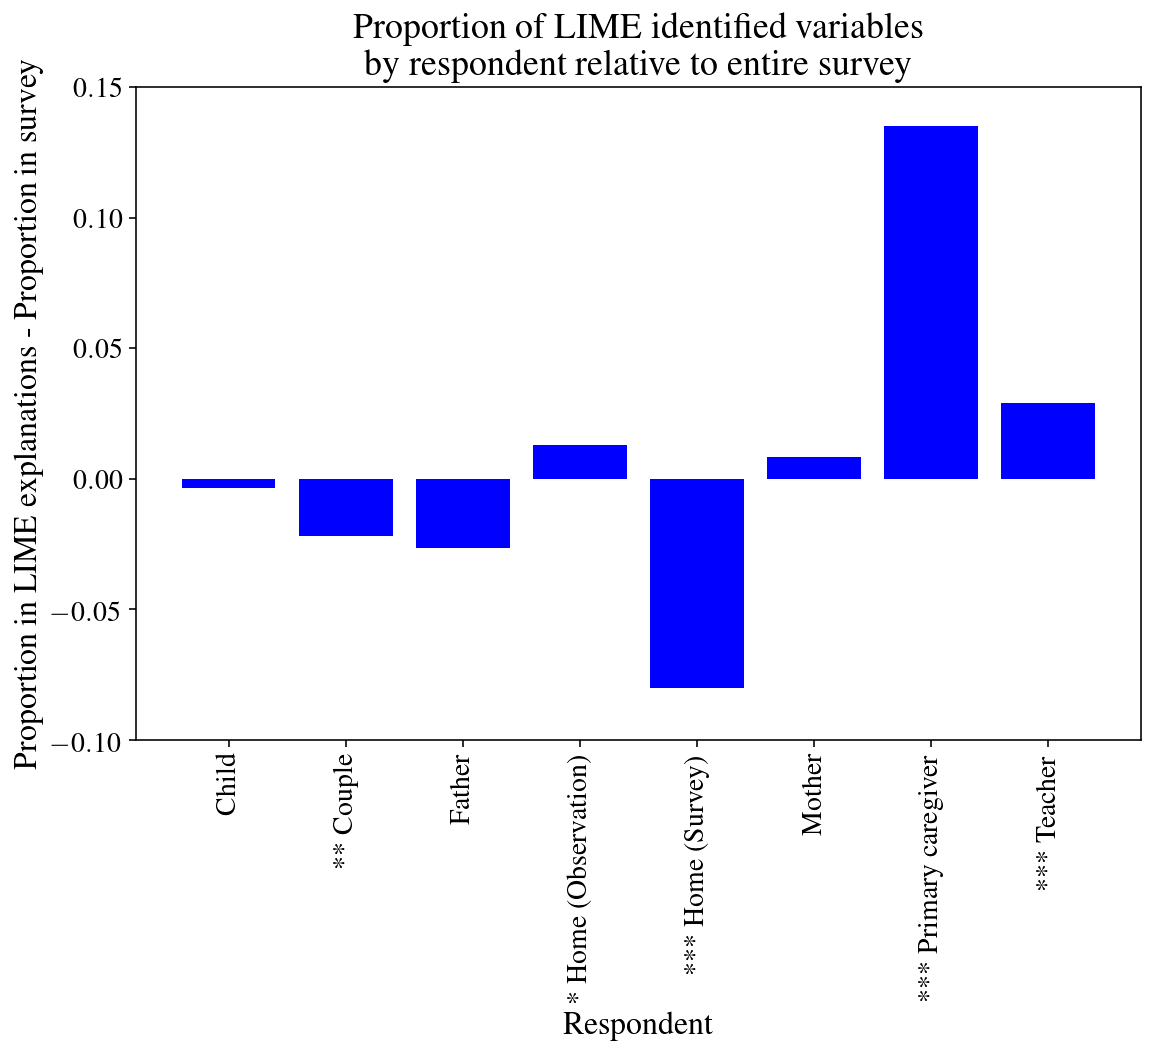

In [62]:
data = list(sorted(resp_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [rsignif[x]+' '+ x for x in word], rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables \n by respondent relative to entire survey',size=18)
plt.ylabel('Proportion in LIME explanations - Proportion in survey',size=16)
plt.xlabel('Respondent', size=16)
plt.yticks(size=14)
plt.ylim(-0.1,0.15)
plt.show()

In [63]:
resp_counts_mod = {}
for k,v in respondent_count_.items():
    prop_observed = v/500
    prop_in_survey = resp_count_full_restricted[k]/df.shape[0]
    resp_counts_mod[k] = prop_observed/prop_in_survey

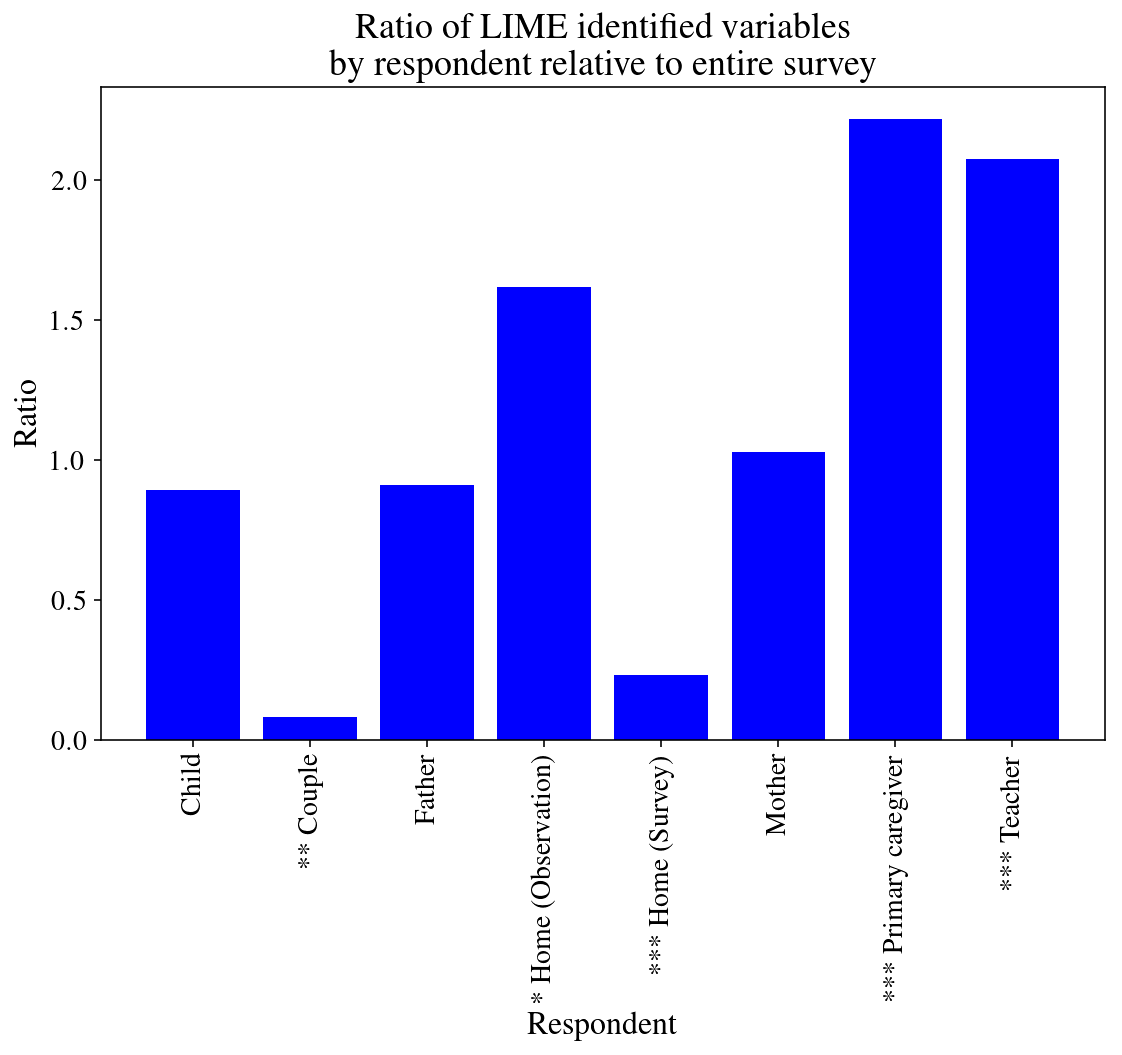

In [64]:
data = list(sorted(resp_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [rsignif[x]+' '+ x for x in word], rotation='vertical',size=14)
plt.title('Ratio of LIME identified variables \n by respondent relative to entire survey',size=18)
plt.ylabel('Ratio',size=16)
plt.xlabel('Respondent', size=16)
plt.yticks(size=14)
#plt.ylim(-0.1,0.15)
plt.show()

Now getting the same for topic:

In [65]:
# Counting both topics 1 and 2
topic1_counts = Counter(list(df['topic1']))
topic2_counts = Counter(list(df['topic2']))
topic_counts_full = topic1_counts + topic2_counts
topic_count_full = {}
for k,v in dict(topic_counts_full).items():
    if isinstance(k, str):
        topic_count_full[k] = v

In [66]:
topic_counts_mod = {}
for k,v in topic_count.items():
    prop_observed = v/500
    prop_in_survey = topic_count_full[k]/df.shape[0]
    topic_counts_mod[k] = prop_observed-prop_in_survey

In [67]:
tsignif = {}
for k,v in topic_count.items():
    count = np.array([v, topic_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        tsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        tsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        tsignif[k] = '**'
    elif pval <= 0.001:
        tsignif[k] = '***'

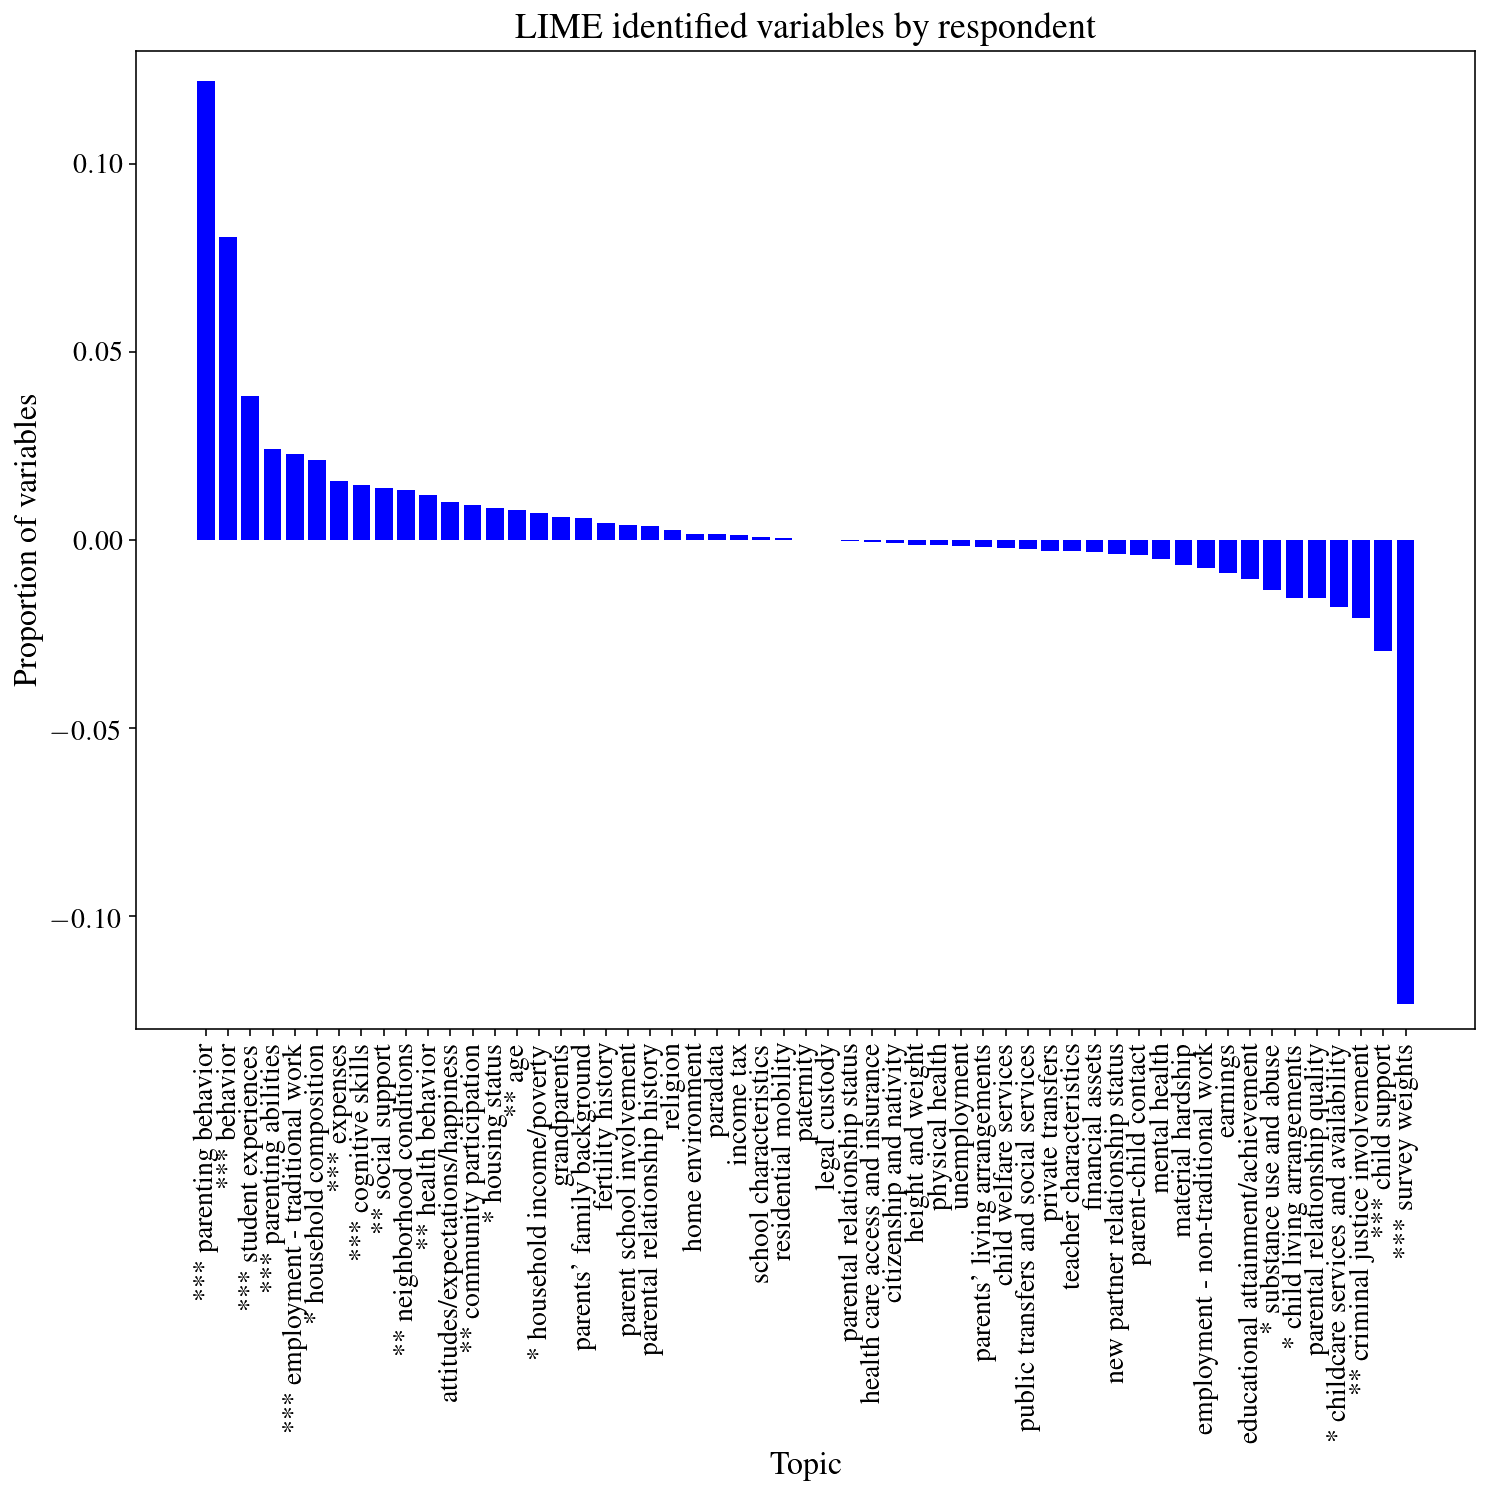

In [68]:
plt.rcParams["figure.figsize"] = (12,9)
data = list(sorted(topic_counts_mod.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [tsignif[x] + ' ' + x for x in word], rotation='vertical',size=14)
plt.title('LIME identified variables by respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Topic', size=16)
plt.yticks(size=14)
plt.ylim(-0.13,0.13)

plt.show()

Now finally to look at the main categories:

In [69]:
u1_counts = Counter(list(df['umbrella1']))
u2_counts = Counter(list(df['umbrella2']))
umbrella_counts_full = u1_counts + u2_counts
umbrella_count_full = {}
for k,v in dict(umbrella_counts_full).items():
    if isinstance(k, str):
        umbrella_count_full[k] = v

In [70]:
umbrella_counts_mod = {}
for k,v in umbrella_count.items():
    prop_observed = v/500
    prop_in_survey = umbrella_count_full[k]/df.shape[0]
    umbrella_counts_mod[k] = prop_observed-prop_in_survey
    

In [71]:
umbrella_counts_mod_ratio = {}
for k,v in umbrella_count.items():
    prop_observed = v/500
    prop_in_survey = umbrella_count_full[k]/df.shape[0]
    umbrella_counts_mod_ratio[k] = prop_observed/prop_in_survey

In [72]:
umbrella_counts_mod

{'Attitudes and expectations': 0.010167220160187538,
 'Childcare': -0.075638080354235845,
 'Cognitive and behavioral development': 0.095218076447222771,
 'Community': 0.022390571075079767,
 'Demographics': -0.0056374291853877739,
 'Education and school': 0.029097089275249066,
 'Employment': -0.051349742788305008,
 'Family and social support': 0.025776518851338154,
 'Finances': -0.029080419352738154,
 'Health and health behavior': -0.02868034121247641,
 'Home and housing': 0.014008334961255448,
 'Legal system': -0.021423585335677543,
 'Paradata and weights': -0.12178745848798594,
 'Parental relationships': -0.023414729439343626,
 'Parenting': 0.13968288077098392}

In [73]:

signif = {}
for k,v in umbrella_count.items():
    count = np.array([v, umbrella_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        signif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        signif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        signif[k] = '**'
    elif pval <= 0.001:
        signif[k] = '***'

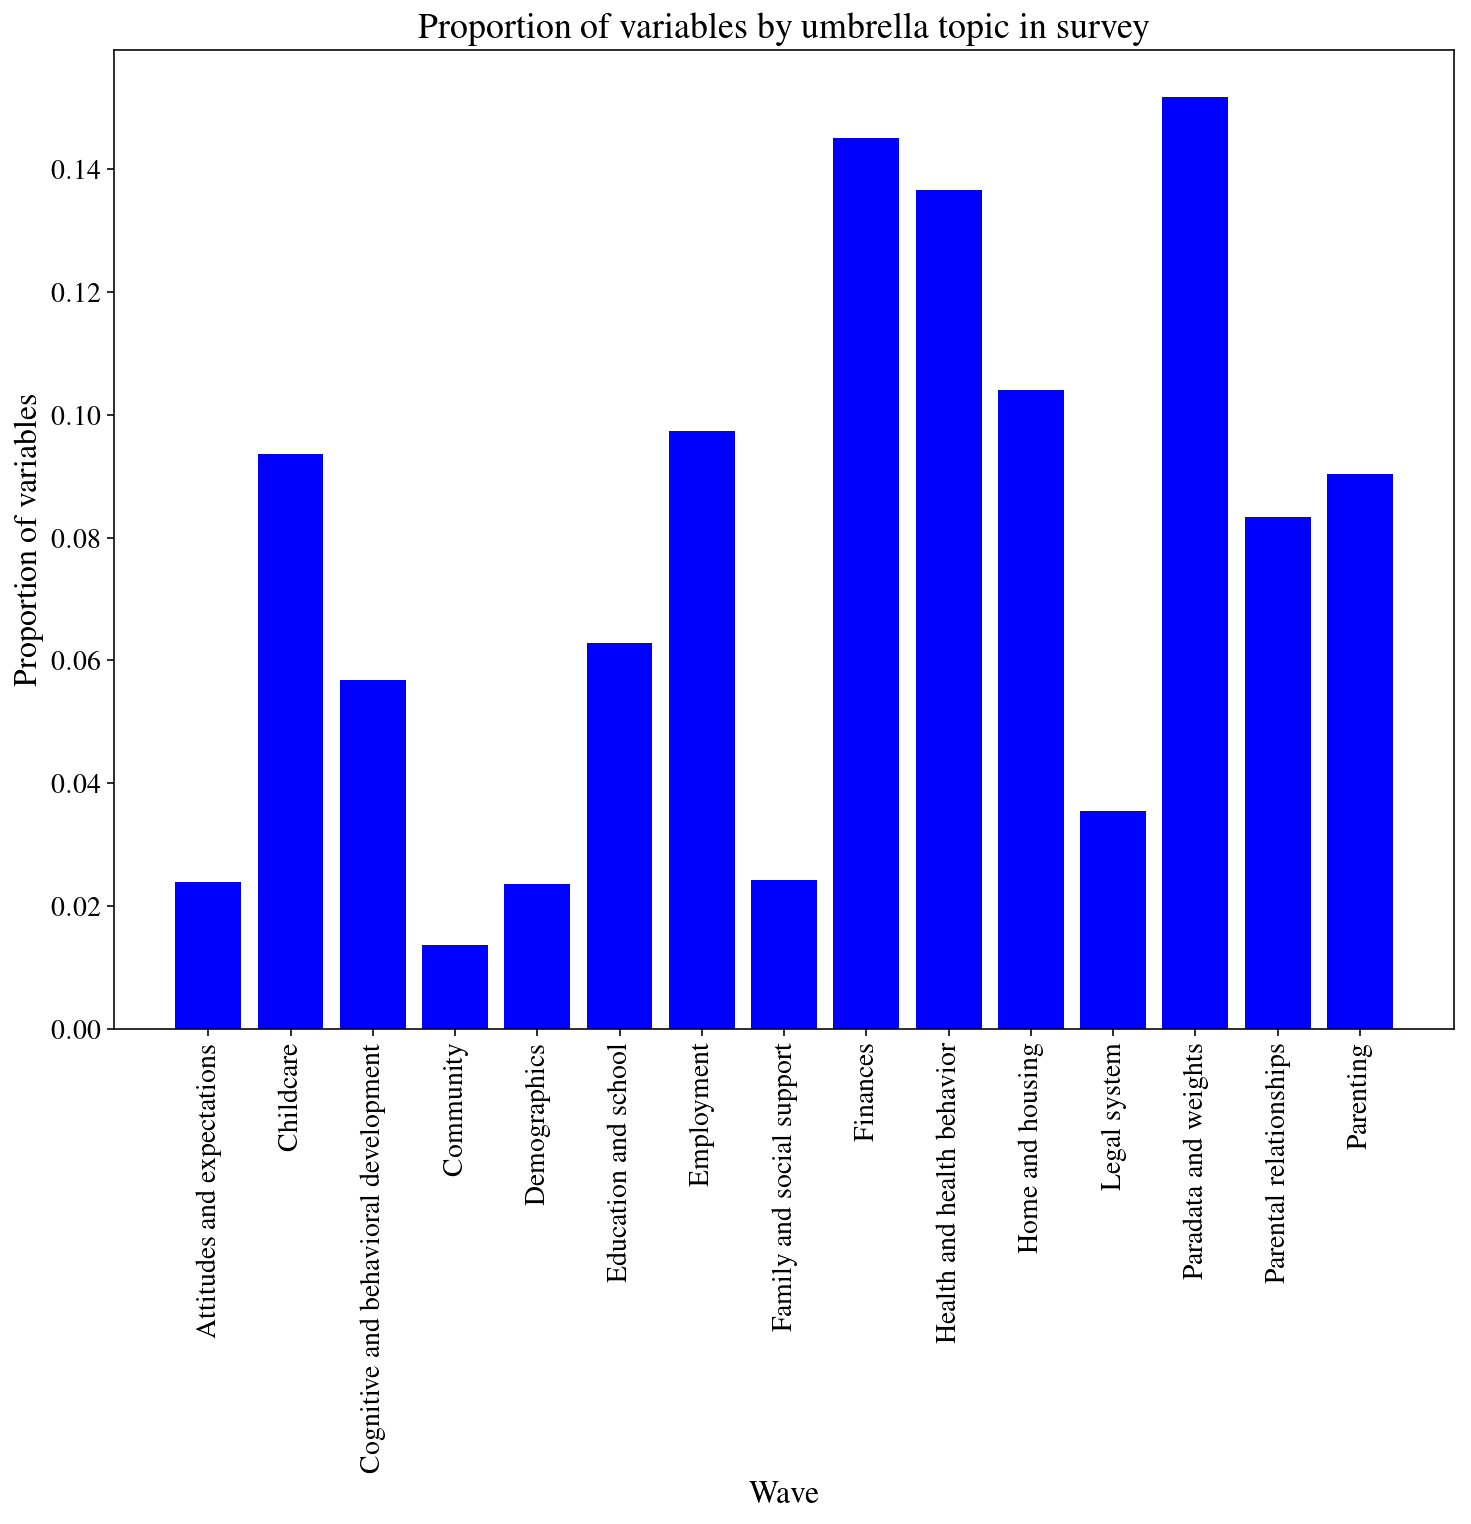

In [74]:
data = list(sorted(umbrella_count_full.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/df.shape[0] for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of variables by umbrella topic in survey',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.yticks(size=14)
plt.show()

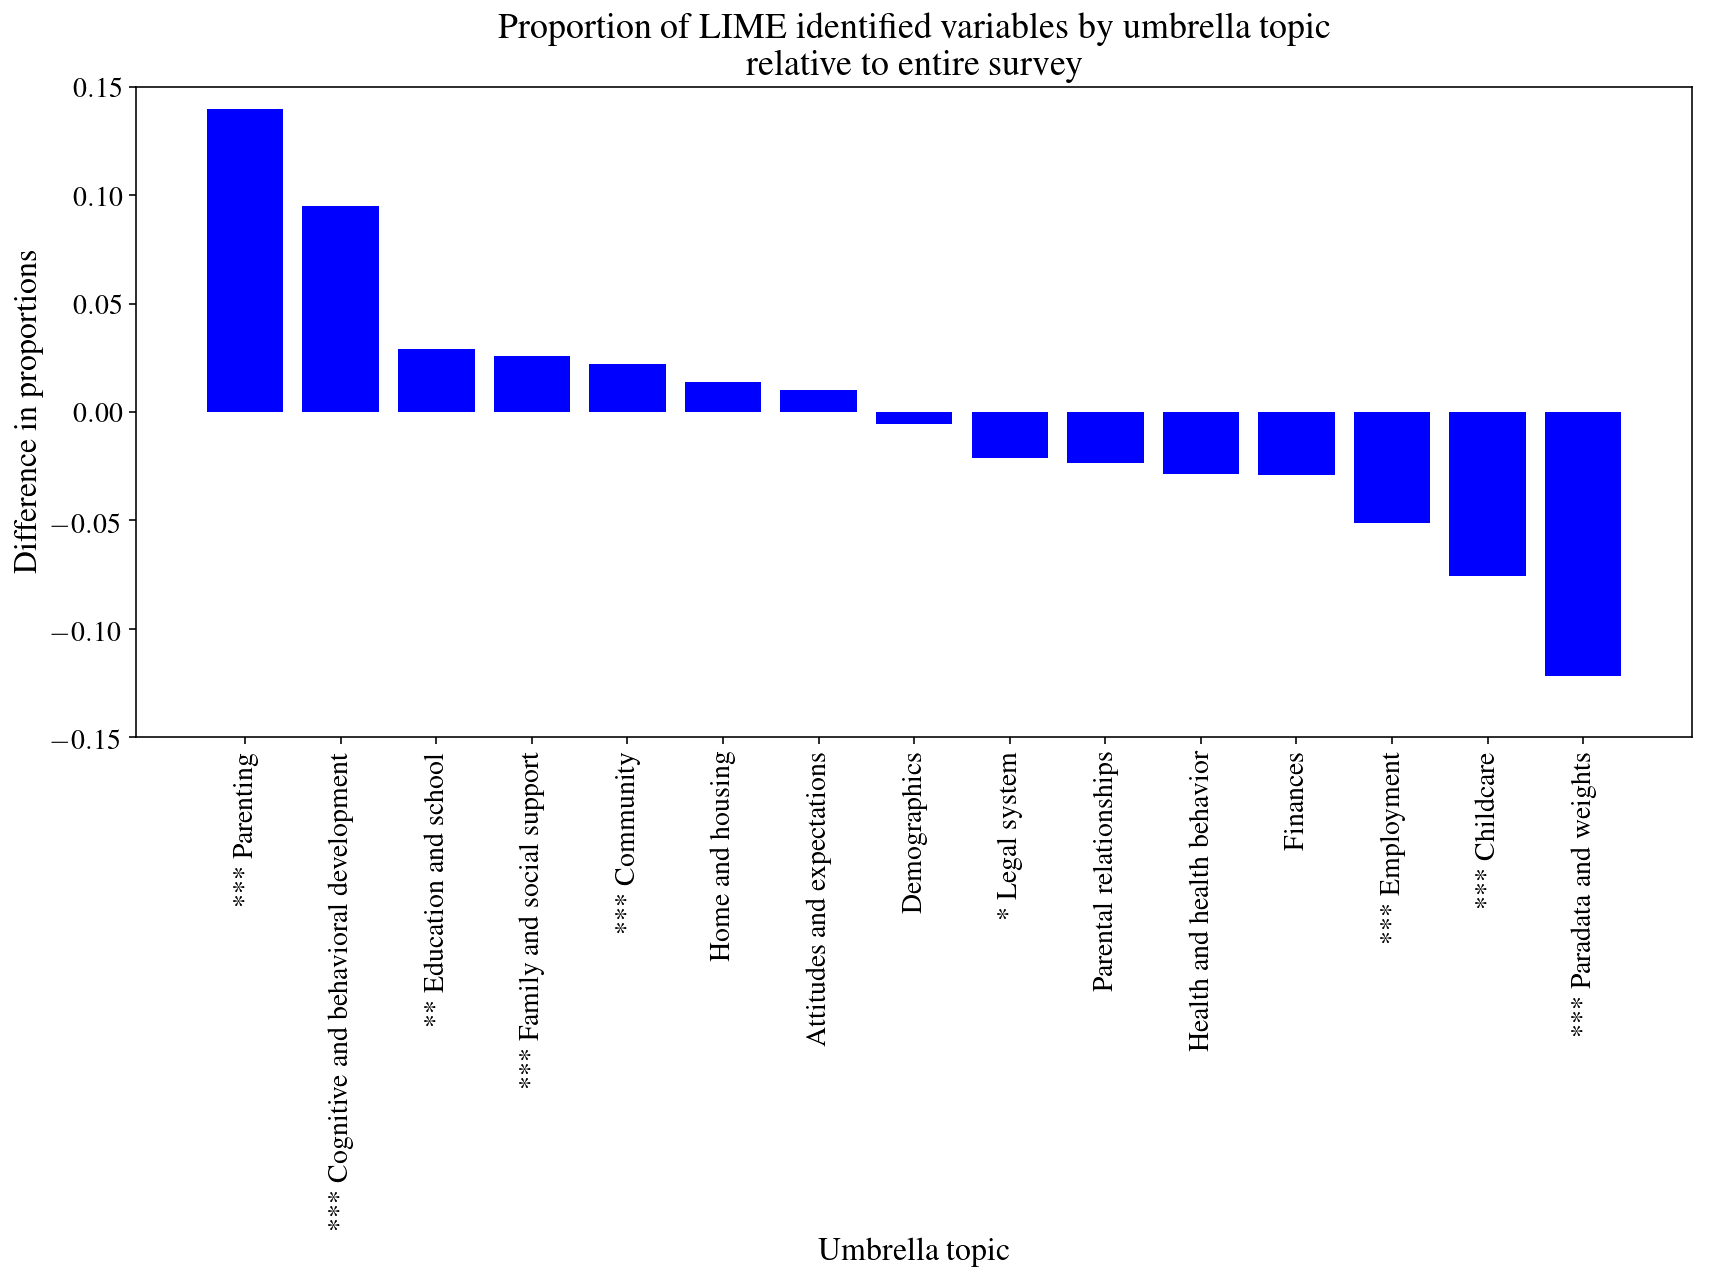

In [75]:
data = list(sorted(umbrella_counts_mod.items(), key=lambda x: x[1],reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [signif[x]+' '+x for x in word], rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables by umbrella topic \n relative to entire survey',size=18)
plt.ylabel('Difference in proportions',size=16)
plt.xlabel('Umbrella topic', size=16)
plt.yticks(size=14)
plt.ylim(-0.15,0.15)
plt.tight_layout()
plt.savefig('umbrella_topics_difference_in_proportions.pdf')
plt.show()

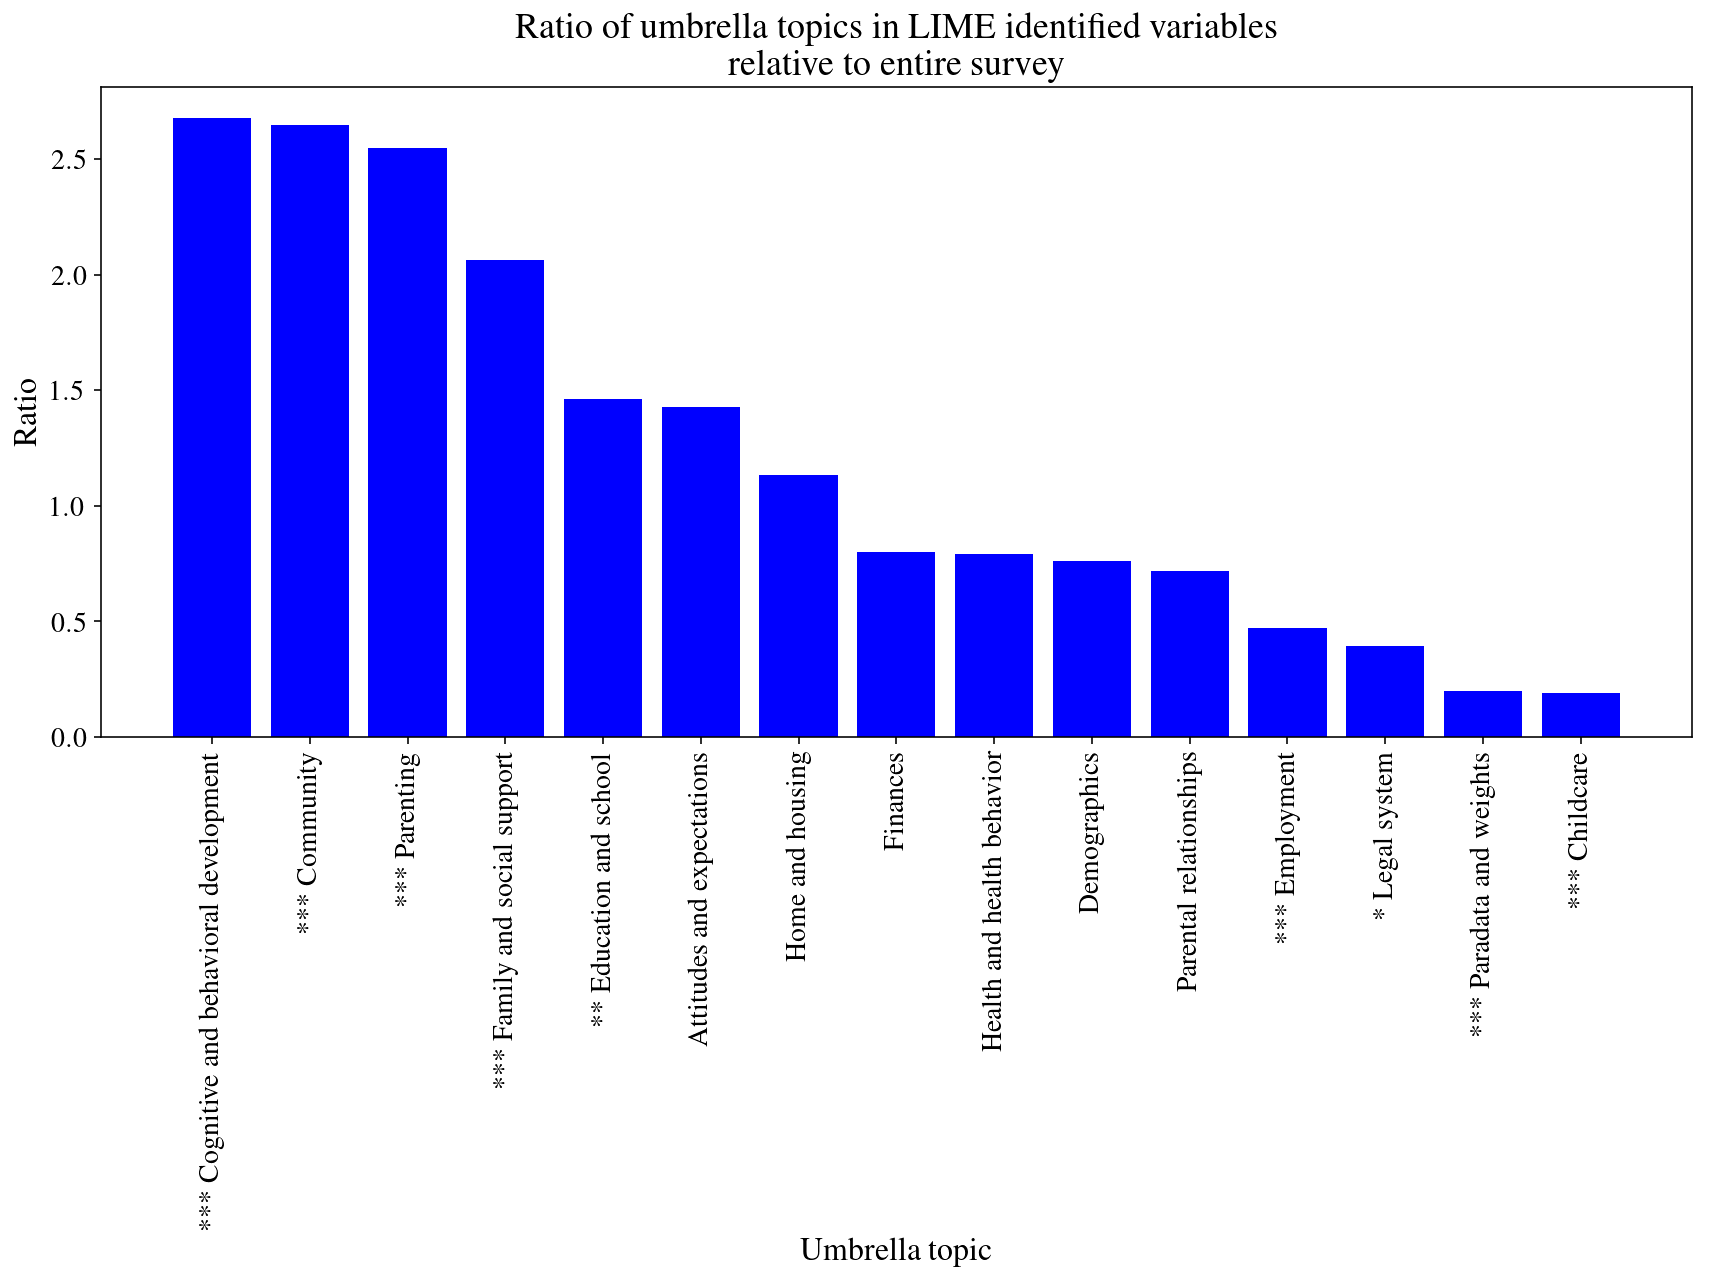

In [76]:
data = list(sorted(umbrella_counts_mod_ratio.items(), key=lambda x: x[1],reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [signif[x]+' '+x for x in word], rotation='vertical',size=14)
plt.title('Ratio of umbrella topics in LIME identified variables \n relative to entire survey',size=18)
plt.ylabel('Ratio',size=16)
plt.xlabel('Umbrella topic', size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('umbrella_topics_ratio.pdf')

plt.show()

Show the difference and the ratio on the same plot:

In [77]:
umbrella_count_full

{'Attitudes and expectations': 366,
 'Childcare': 1438,
 'Cognitive and behavioral development': 872,
 'Community': 209,
 'Demographics': 363,
 'Education and school': 966,
 'Employment': 1495,
 'Family and social support': 372,
 'Finances': 2228,
 'Health and health behavior': 2099,
 'Home and housing': 1597,
 'Legal system': 544,
 'Paradata and weights': 2331,
 'Parental relationships': 1281,
 'Parenting': 1387}